
# Exploratory Data Analysis (EDA)  of   PEA18 - Annual Population Change Component


Notebook provides an exploratory data analysis (EDA) of the PEA18  The complete series of datasets can be found at
[Central Statistics Office in Ireland  population of Ireland,](https://data.cso.ie/product/pme)

| Code   | Description               | Status |
| ------ | ------------------------- | ------ |
| PEA01  | Population Estimates      | EDAed       |
| PEA03  | Flow                      |        |
| PEA04  | Region                    |        |
| PEA11  | Single                    |        |
| PEA15  | Component                 | EDAed       |
| PEA18  | Origin/Destination        |        |
| PEA23  | Citizenship Emigration    |        |
| PEA24  | Citizenship Immigration   |        |
| PEA25  | Citizenship Population    |        |

Click on the image to explore reconfigure the data at source.

<a href="https://data.cso.ie/table/PEA18">
    <img src="../screens/pea18.png" alt="Example Image" width="300"/>
</a>





## Data Loading Data Libraries and Functions



In [76]:
import pandas as pd
import altair as alt
# Enable the VegaFusion data transformer
alt.data_transformers.enable('vegafusion')
import matplotlib.pyplot as plt
# Adjusting default font sizes for all plots
plt.rcParams['axes.titlesize'] = 16   # For title
plt.rcParams['axes.labelsize'] = 16   # For x and y labels
plt.rcParams['xtick.labelsize'] = 12  # For x-axis tick labels
plt.rcParams['ytick.labelsize'] = 12  # For y-axis tick labels
import seaborn as sns
import os
import warnings
# Suppress all warnings
warnings.filterwarnings('ignore')

%matplotlib inline


In [77]:
# Load the dataset
file_path = '../raw/PEA18.csv'
df = pd.read_csv(file_path)

In [78]:
# Preview top 5 rows
df.head() # Note examples of missing population change data in top few rows

,STATISTIC Label,Year,Country,Sex,Origin or Destination,UNIT,VALUE
0,Estimated Migration (Persons in April),1987,United Kingdom (1),Both sexes,Net migration,Thousand,-13.7
1,Estimated Migration (Persons in April),1987,United Kingdom (1),Both sexes,Emigrants: All destinations,Thousand,21.8
2,Estimated Migration (Persons in April),1987,United Kingdom (1),Both sexes,Immigrants: All origins,Thousand,8.1
3,Estimated Migration (Persons in April),1987,United Kingdom (1),Male,Net migration,Thousand,-9.0
4,Estimated Migration (Persons in April),1987,United Kingdom (1),Male,Emigrants: All destinations,Thousand,13.1


In [79]:
#  Unique Values
df.nunique()

STATISTIC Label            1
Year                      37
Country                    8
Sex                        3
Origin or Destination      3
UNIT                       1
VALUE                    486
dtype: int64

In [80]:
# Unique values in non-numeric columns
{col: df[col].unique() for col in df.select_dtypes(include='object').columns}

{'STATISTIC Label': array(['Estimated Migration (Persons in April)'], dtype=object),
 'Country': array(['United Kingdom (1)', 'United States', 'Canada', 'Australia',
        'Other countries (23)', 'All countries',
        'EU14 excl Irl (UK & Ireland)',
        'EU15 to EU27 (accession countries joined post 2004)'],
       dtype=object),
 'Sex': array(['Both sexes', 'Male', 'Female'], dtype=object),
 'Origin or Destination': array(['Net migration', 'Emigrants: All destinations',
        'Immigrants: All origins'], dtype=object),
 'UNIT': array(['Thousand'], dtype=object)}

 ## Duplication
 There are no duplicated rows in dataframe df_long.

In [81]:
# duplicates = df_long.duplicated()
# any_duplicates = duplicates.any()
# # Print result based on the condition
# if any_duplicates:
#     print("There are duplicated rows in dataframe df_long.")
# else:
#     print("There are no duplicated rows in dataframe df_long.")

## Long Dataframe housekeeping 

In [82]:
# Check if the columns 'STATISTIC Label' and 'UNIT' exist in the DataFrame
columns_to_drop = [col for col in ['STATISTIC Label', 'UNIT'] if col in df.columns]

# Drop the columns if they exist
if columns_to_drop:
    df = df.drop(columns_to_drop, axis=1)


# Renaming the remaining columns according to pythonic conventions
df = df.rename(columns={
    'Year': 'year',
    'Country':'country',
    'Sex': 'sex',
    'Origin or Destination': 'endpoint',
    'VALUE': 'value'
})
#preview changes
df.head()

,year,country,sex,endpoint,value
0,1987,United Kingdom (1),Both sexes,Net migration,-13.7
1,1987,United Kingdom (1),Both sexes,Emigrants: All destinations,21.8
2,1987,United Kingdom (1),Both sexes,Immigrants: All origins,8.1
3,1987,United Kingdom (1),Male,Net migration,-9.0
4,1987,United Kingdom (1),Male,Emigrants: All destinations,13.1


In [83]:

# Save the clean DataFrame to a new CSV file
df.to_csv('../data/country_long.csv', index=True)

In [84]:
# Pivoting the data with 'country' as columns and 'year', 'sex', 'endpoint' as index
df_pivot = df.pivot_table(index=['year', 'sex', 'endpoint'], columns='country', values='value', aggfunc='first')
#Reset index
df_pivot.reset_index(inplace=True)
# Save the clean DataFrame to a new CSV file
df_pivot.to_csv('../data/country-pivot.csv', index=True)
# Resetting the index to use 'year' in the plot
df_pivot = df_pivot.reset_index()
# Displaying the first few rows of the pivoted data
df_pivot.columns

Index(['index', 'year', 'sex', 'endpoint', 'All countries', 'Australia',
       'Canada', 'EU14 excl Irl (UK & Ireland)',
       'EU15 to EU27 (accession countries joined post 2004)',
       'Other countries (23)', 'United Kingdom (1)', 'United States'],
      dtype='object', name='country')

In [85]:
df_pivot

country,index,year,sex,endpoint,All countries,Australia,Canada,EU14 excl Irl (UK & Ireland),EU15 to EU27 (accession countries joined post 2004),Other countries (23),United Kingdom (1),United States
0,0,1987,Both sexes,Emigrants: All destinations,40.2,NaN,NaN,3.1,NaN,5.4,21.8,9.9
1,1,1987,Both sexes,Immigrants: All origins,17.2,NaN,NaN,2.2,NaN,4.0,8.1,3.0
2,2,1987,Both sexes,Net migration,-23.0,NaN,NaN,-0.9,NaN,-1.4,-13.7,-6.9
3,3,1987,Female,Emigrants: All destinations,NaN,NaN,NaN,1.9,NaN,2.8,8.7,5.2
4,4,1987,Female,Immigrants: All origins,NaN,NaN,NaN,1.2,NaN,2.2,4.0,1.7
...,...,...,...,...,...,...,...,...,...,...,...,...
328,328,2023,Female,Immigrants: All origins,75.5,3.7,4.7,8.8,5.0,41.0,9.4,2.9
329,329,2023,Female,Net migration,42.6,1.3,2.9,-0.3,-0.2,34.6,4.7,-0.4
330,330,2023,Male,Emigrants: All destinations,31.0,2.3,3.5,4.8,3.6,5.3,9.9,1.6
331,331,2023,Male,Immigrants: All origins,66.1,4.0,2.5,8.9,3.9,34.8,9.0,3.0


In [86]:
# Dictionary for renaming columns
rename_dict = {
    'EU14 excl Irl (UK & Ireland)': 'EU14_excl_Irl_UK',
    'EU15 to EU27 (accession countries joined post 2004)': 'EU15_to_27',
    'Other countries (23)': 'other_countries_23',
    'United Kingdom (1)': 'UK',
    'United States': 'USA'
}

# Applying the renaming
df_pivot = df_pivot.rename(columns=rename_dict)

# Previewing the DataFrame to check the changes
df_pivot.head()


country,index,year,sex,endpoint,All countries,Australia,Canada,EU14_excl_Irl_UK,EU15_to_27,other_countries_23,UK,USA
0,0,1987,Both sexes,Emigrants: All destinations,40.2,NaN,NaN,3.1,NaN,5.4,21.8,9.9
1,1,1987,Both sexes,Immigrants: All origins,17.2,NaN,NaN,2.2,NaN,4.0,8.1,3.0
2,2,1987,Both sexes,Net migration,-23.0,NaN,NaN,-0.9,NaN,-1.4,-13.7,-6.9
3,3,1987,Female,Emigrants: All destinations,NaN,NaN,NaN,1.9,NaN,2.8,8.7,5.2
4,4,1987,Female,Immigrants: All origins,NaN,NaN,NaN,1.2,NaN,2.2,4.0,1.7


In [87]:
# NaNs mask summed per column.
df_pivot.isna().sum()

country
index                   0
year                    0
sex                     0
endpoint                0
All countries          20
Australia             189
Canada                189
EU14_excl_Irl_UK        0
EU15_to_27            162
other_countries_23      0
UK                      0
USA                     0
dtype: int64

In [88]:
# Save the clean DataFrame to a new CSV file
df_pivot.to_csv('../data/pivot_citizenship_migrations.csv', index=True)

In [89]:


# Analyzing NaN values
nan_analysis = df_pivot.isna().sum().sort_values(ascending=False)
nan_percentage = (df_pivot.isna().sum() / len(df_pivot) * 100).sort_values(ascending=False)

# Combining the analysis into a DataFrame
nan_analysis_df = pd.DataFrame({
    'Total NaN': nan_analysis,
    'Percentage NaN': nan_percentage
})

nan_analysis_df.head()  # Displaying the top columns with NaN values for analysis



,Total NaN,Percentage NaN
country,,
Australia,189,56.756757
Canada,189,56.756757
EU15_to_27,162,48.648649
All countries,20,6.006006
index,0,0.000000


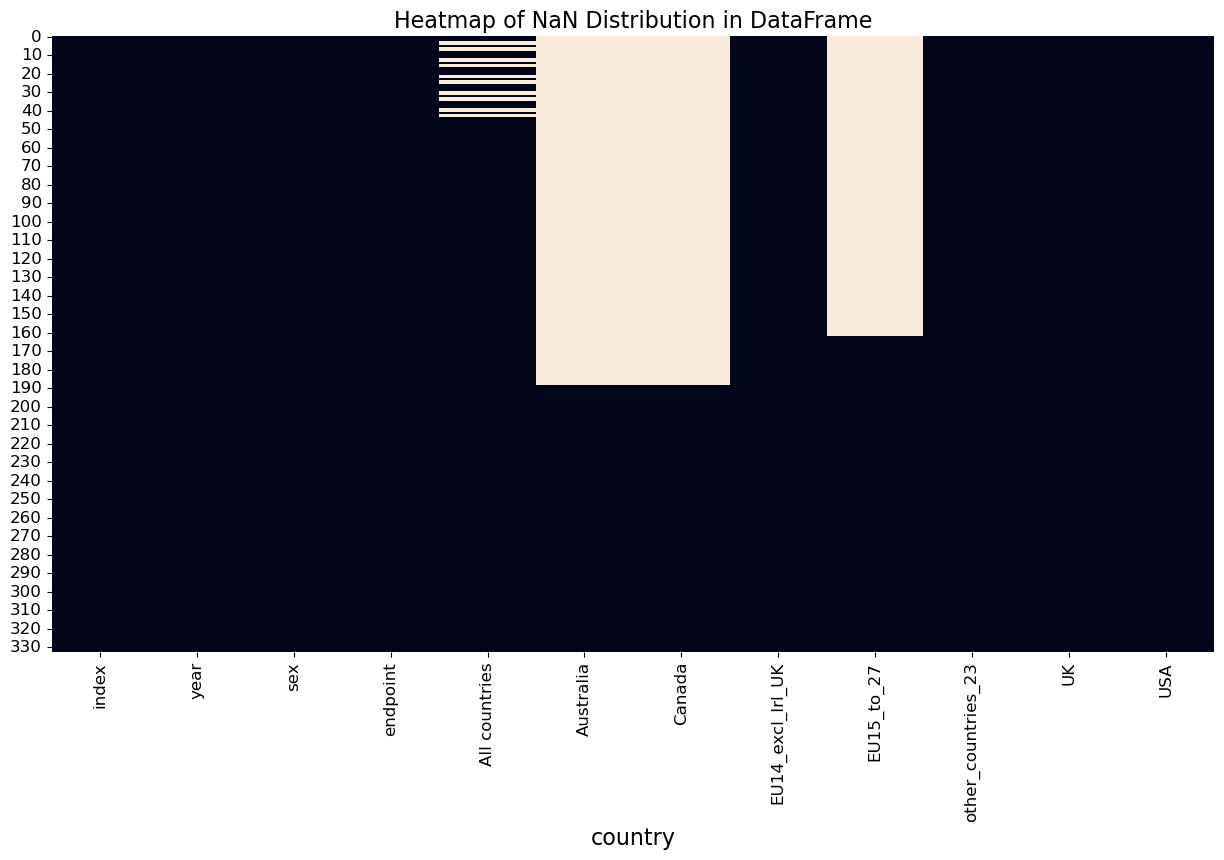

In [90]:

# Plotting a heatmap to show the distribution of NaN values
plt.figure(figsize=(15, 8))
sns.heatmap(df_pivot.isna(), cbar=False)
plt.title("Heatmap of NaN Distribution in DataFrame")
plt.savefig('../images/pea18citizenship_migrationsregionmissingheat.png')
plt.show()



In [91]:
# Unique values in non-numeric columns
{col: df[col].unique() for col in df.select_dtypes(include='object').columns}

{'country': array(['United Kingdom (1)', 'United States', 'Canada', 'Australia',
        'Other countries (23)', 'All countries',
        'EU14 excl Irl (UK & Ireland)',
        'EU15 to EU27 (accession countries joined post 2004)'],
       dtype=object),
 'sex': array(['Both sexes', 'Male', 'Female'], dtype=object),
 'endpoint': array(['Net migration', 'Emigrants: All destinations',
        'Immigrants: All origins'], dtype=object)}

In [92]:
df_pivot

country,index,year,sex,endpoint,All countries,Australia,Canada,EU14_excl_Irl_UK,EU15_to_27,other_countries_23,UK,USA
0,0,1987,Both sexes,Emigrants: All destinations,40.2,NaN,NaN,3.1,NaN,5.4,21.8,9.9
1,1,1987,Both sexes,Immigrants: All origins,17.2,NaN,NaN,2.2,NaN,4.0,8.1,3.0
2,2,1987,Both sexes,Net migration,-23.0,NaN,NaN,-0.9,NaN,-1.4,-13.7,-6.9
3,3,1987,Female,Emigrants: All destinations,NaN,NaN,NaN,1.9,NaN,2.8,8.7,5.2
4,4,1987,Female,Immigrants: All origins,NaN,NaN,NaN,1.2,NaN,2.2,4.0,1.7
...,...,...,...,...,...,...,...,...,...,...,...,...
328,328,2023,Female,Immigrants: All origins,75.5,3.7,4.7,8.8,5.0,41.0,9.4,2.9
329,329,2023,Female,Net migration,42.6,1.3,2.9,-0.3,-0.2,34.6,4.7,-0.4
330,330,2023,Male,Emigrants: All destinations,31.0,2.3,3.5,4.8,3.6,5.3,9.9,1.6
331,331,2023,Male,Immigrants: All origins,66.1,4.0,2.5,8.9,3.9,34.8,9.0,3.0


In [93]:
df_pivot.columns

Index(['index', 'year', 'sex', 'endpoint', 'All countries', 'Australia',
       'Canada', 'EU14_excl_Irl_UK', 'EU15_to_27', 'other_countries_23', 'UK',
       'USA'],
      dtype='object', name='country')

### Analysis of Net Migration Trends

#### Spike in 'other_countries_23'
The sharp increase observed in the net migration data for 'other_countries_23' could be attributed to significant geopolitical events, such as the Russian invasion of Ukraine. This conflict, which escalated in 2022, led to a large displacement of people, resulting in an increase in migration figures. The data reflects the impact of such large-scale conflicts on migration patterns, where countries neighboring conflict zones or those perceived as safe havens often see an influx of refugees and asylum seekers.

#### Trends in 'EU15_to_27' from 2005 to 2008
The 'EU15_to_27' data show a notable increase in net migration during the years 2005 to 2008. This trend might be associated with the EU's eastward expansion and the resulting migration patterns. The accession of several Eastern European countries to the EU during this period likely facilitated increased movement of people within the EU. Following this spike, the net migration appears to stabilize at lower levels, suggesting a normalization of migration patterns post-enlargement.


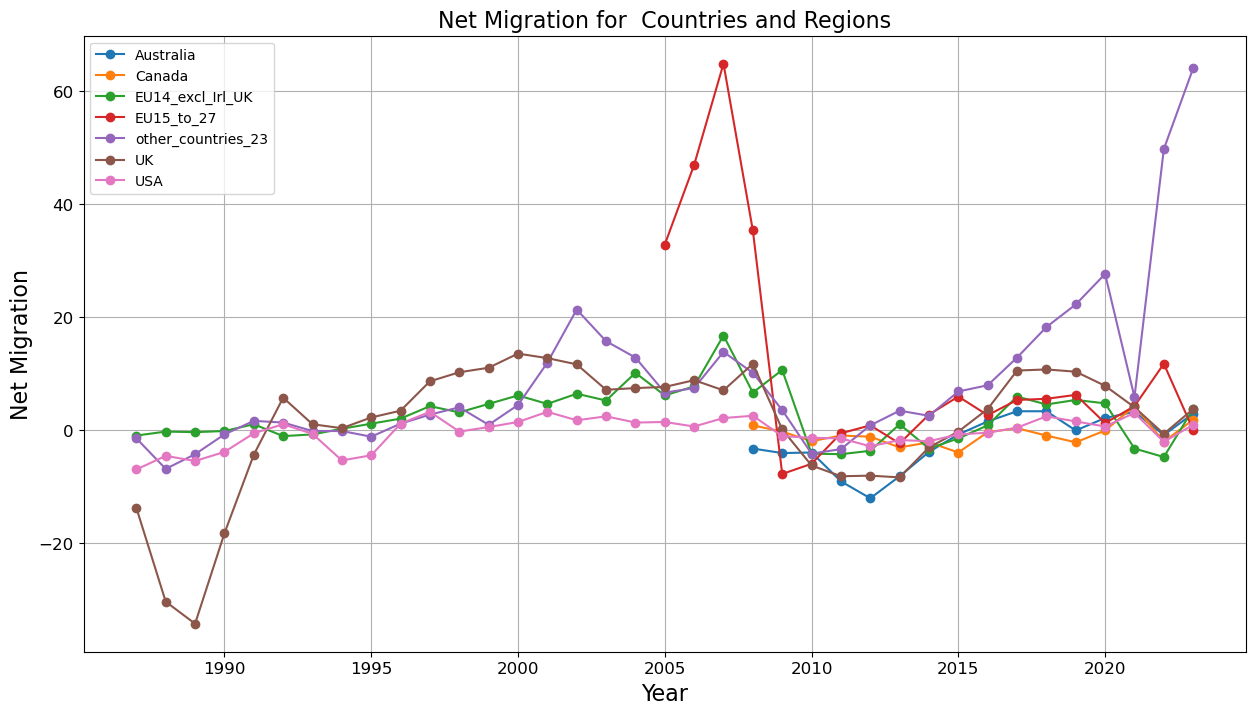

In [94]:

# Specifying the correct list of countries and regions
country_region_list = ['Australia', 'Canada', 'EU14_excl_Irl_UK', 'EU15_to_27', 'other_countries_23', 'UK', 'USA']

# Resetting the index of the DataFrame to use 'year' for plotting
df_pivot_reset = df_pivot.reset_index()

# Filtering the DataFrame for 'Net migration' and 'Both sexes'
net_migration_selected = df_pivot_reset[
    (df_pivot_reset['endpoint'] == 'Net migration') & (df_pivot_reset['sex'] == 'Both sexes')
]

# Plotting the 'Net migration' data for the specified countries and regions
plt.figure(figsize=(15, 8))
for col in country_region_list:
    plt.plot(net_migration_selected['year'], net_migration_selected[col], marker='o', label=col)

plt.title('Net Migration for  Countries and Regions')
plt.xlabel('Year')
plt.ylabel('Net Migration')
plt.legend()
plt.grid(True)
plt.savefig('../images/pea18citizenship_migrationsregions.png')
plt.show()




In [99]:
df_pivot['Australia'] = df_pivot['Australia'].fillna(method='bfill')
df_pivot['Canada'] = df_pivot['Canada'].fillna(method='bfill')
df_pivot['All countries'] = df_pivot['All countries'].interpolate(method='linear')
df_pivot.isna().sum()
df_pivot['EU15_to_27'] = df_pivot['EU15_to_27'].fillna(0)
df_pivot.isna().sum()

country
index                 0
year                  0
sex                   0
endpoint              0
All countries         0
Australia             0
Canada                0
EU14_excl_Irl_UK      0
EU15_to_27            0
other_countries_23    0
UK                    0
USA                   0
dtype: int64

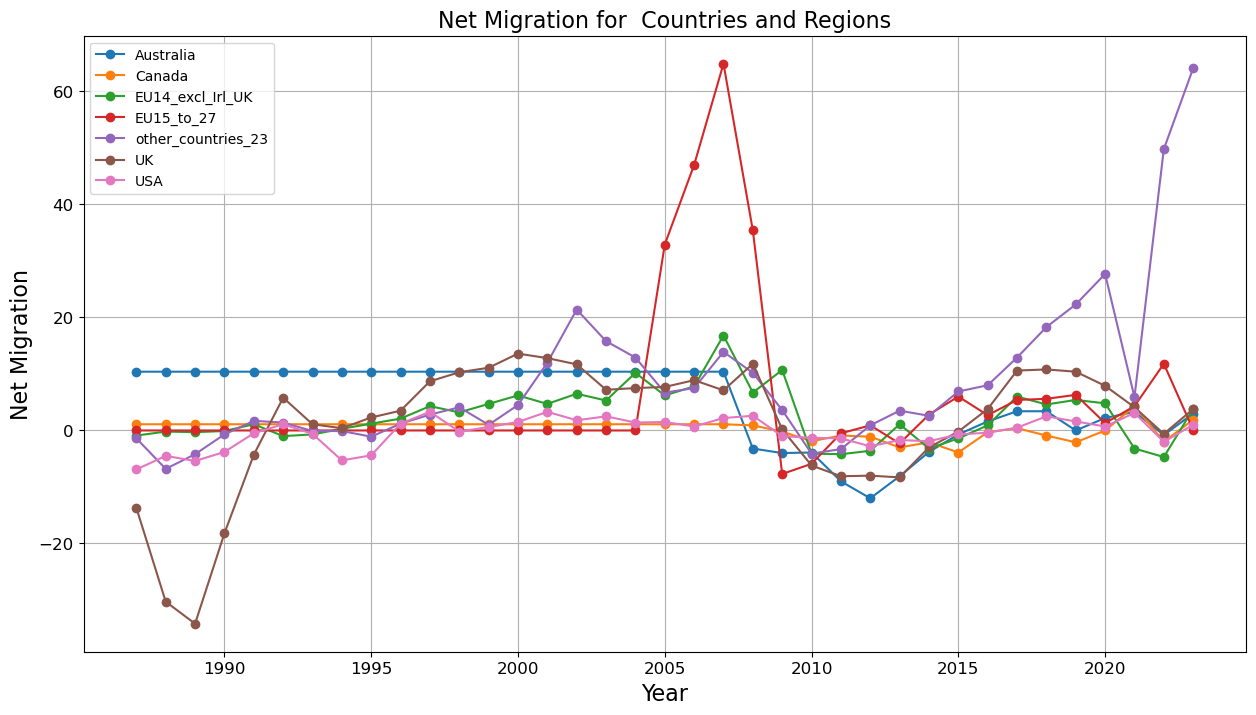

In [105]:
country_region_list = ['Australia', 'Canada', 'EU14_excl_Irl_UK', 'EU15_to_27', 'other_countries_23', 'UK', 'USA']

# Resetting the index of the DataFrame to use 'year' for plotting
df_pivot_reset = df_pivot.reset_index()

# Filtering the DataFrame for 'Net migration' and 'Both sexes'
net_migration_selected = df_pivot_reset[
    (df_pivot_reset['endpoint'] == 'Net migration') & (df_pivot_reset['sex'] == 'Both sexes')
]

# Plotting the 'Net migration' data for the specified countries and regions
plt.figure(figsize=(15, 8))
for col in country_region_list:
    plt.plot(net_migration_selected['year'], net_migration_selected[col], marker='o', label=col)

plt.title('Net Migration for  Countries and Regions')
plt.xlabel('Year')
plt.ylabel('Net Migration')
plt.legend()
plt.grid(True)
plt.savefig('../images/pea18cleanedregionalmigration.png')
plt.show()


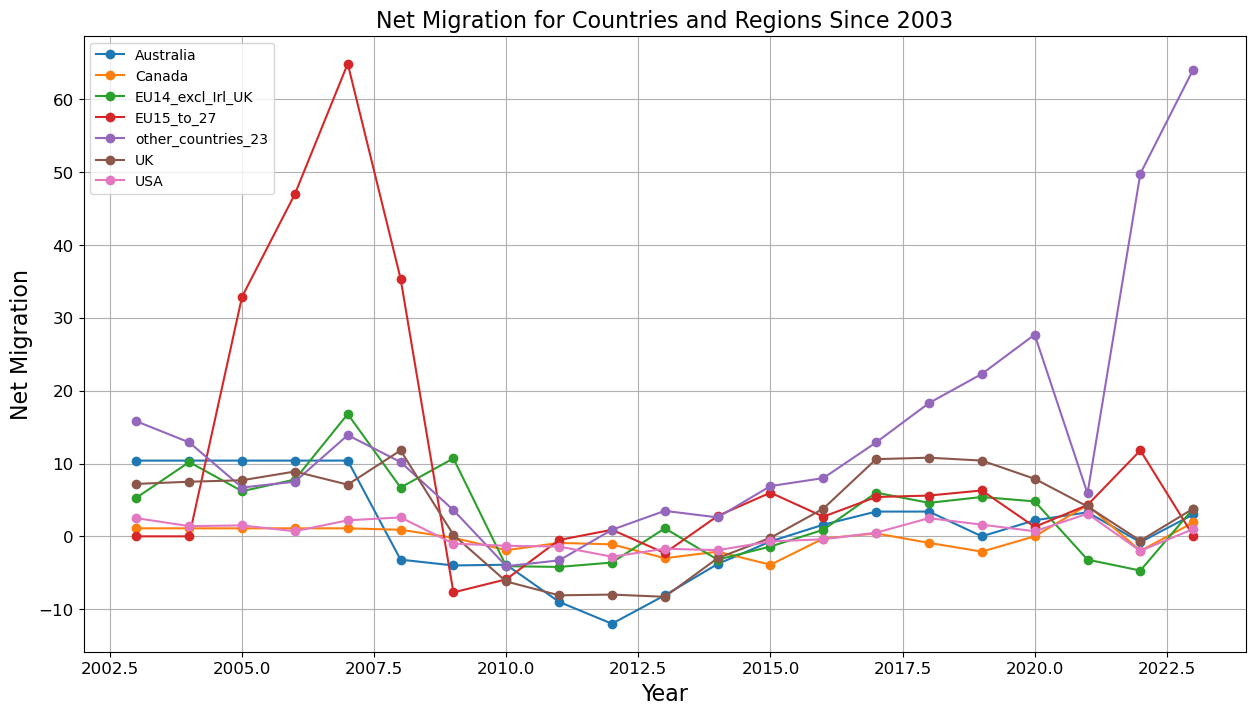

In [120]:
# Define the minimum year for the analysis
min_year = 2003 # Set your desired minimum year

# Specifying the correct list of countries and regions
country_region_list = ['Australia', 'Canada', 'EU14_excl_Irl_UK', 'EU15_to_27', 'other_countries_23', 'UK', 'USA']

# Resetting the index of the DataFrame to use 'year' for plotting
df_pivot_reset = df_pivot.reset_index()

# Filtering the DataFrame for 'Net migration', 'Both sexes', and years greater than or equal to min_year
net_migration_selected = df_pivot_reset[
    (df_pivot_reset['endpoint'] == 'Net migration') & 
    (df_pivot_reset['sex'] == 'Both sexes') & 
    (df_pivot_reset['year'] >= min_year)
]

# Plotting the 'Net migration' data for the specified countries and regions
plt.figure(figsize=(15, 8))
for col in country_region_list:
    plt.plot(net_migration_selected['year'], net_migration_selected[col], marker='o', label=col)

plt.title(f'Net Migration for Countries and Regions Since {min_year}')
plt.xlabel('Year')
plt.ylabel('Net Migration')
plt.legend()
plt.grid(True)
plt.savefig(f'../images/pea18since_{min_year}.png')
plt.show()


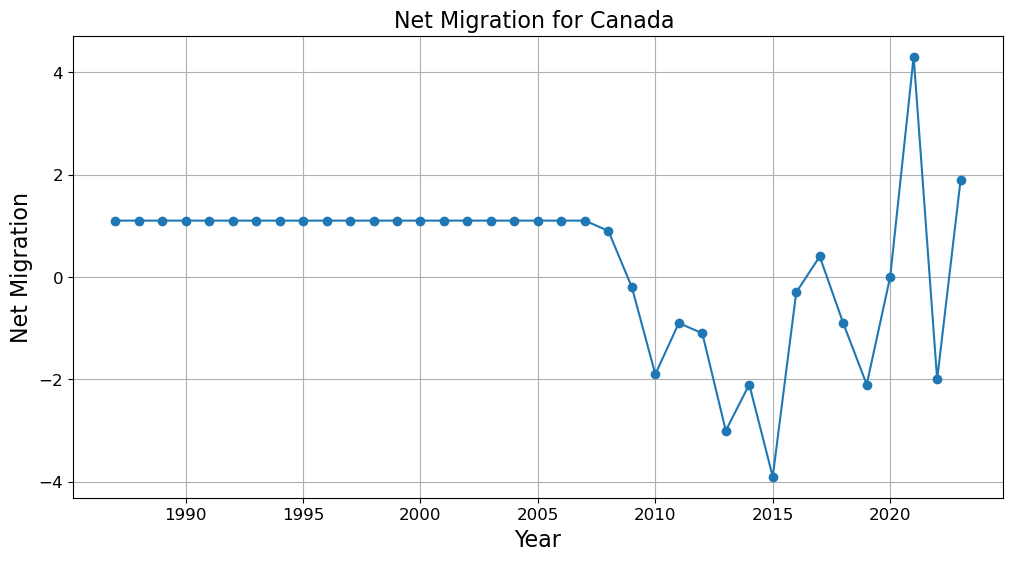

In [107]:


# Filtering the DataFrame for 'Net migration', 'Canada', and 'Both sexes'
net_migration_canada_both_sexes = df_pivot[
    (df_pivot['endpoint'] == 'Net migration') & (df_pivot['sex'] == 'Both sexes')
][['year', 'Canada']]

# Plotting the 'Net migration' data for Canada for 'Both sexes'
plt.figure(figsize=(12, 6))
plt.plot(net_migration_canada_both_sexes['year'], net_migration_canada_both_sexes['Canada'], marker='o')
plt.title('Net Migration for Canada ')
plt.xlabel('Year')
plt.ylabel('Net Migration')
plt.grid(True)
plt.savefig('../images/pea18migrationsCanada.png')
plt.show()

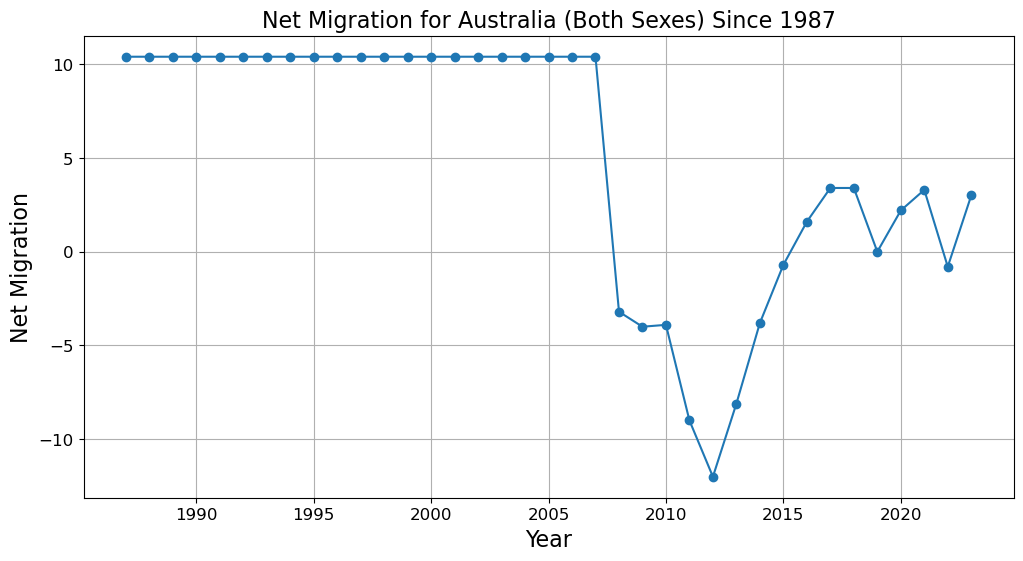

In [108]:
# Variables for country and since_year
country = "Australia"
since_year = "1987"  # Example year, replace with the actual year as needed

# Filtering the DataFrame for 'Net migration', specified country, and 'Both sexes'
net_migration_country_both_sexes = df_pivot[
    (df_pivot['endpoint'] == 'Net migration') & (df_pivot['sex'] == 'Both sexes')
][['year', country]]

# Plotting the 'Net migration' data for the specified country for 'Both sexes'
plt.figure(figsize=(12, 6))
plt.plot(net_migration_country_both_sexes['year'], net_migration_country_both_sexes[country], marker='o')
plt.title(f'Net Migration for {country} (Both Sexes) Since {since_year}')
plt.xlabel('Year')
plt.ylabel('Net Migration')
plt.grid(True)

# Saving the figure with a dynamic filename based on country and since_year
filename = f"../images/pea18migrations_for_{country}_since_{since_year}.png"
plt.savefig(filename)
plt.show()


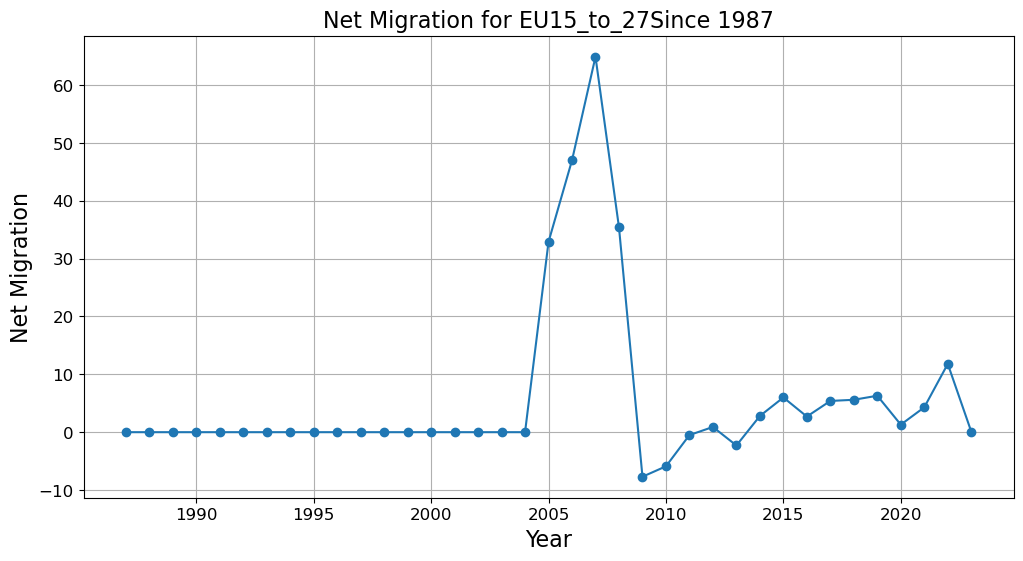

In [109]:
# Variables for country and since_year
country = "EU15_to_27"
since_year = "1987"  # Example year, replace with the actual year as needed

# Filtering the DataFrame for 'Net migration', specified country, and 'Both sexes'
net_migration_country_both_sexes = df_pivot[
    (df_pivot['endpoint'] == 'Net migration') & (df_pivot['sex'] == 'Both sexes')
][['year', country]]

# Plotting the 'Net migration' data for the specified country for 'Both sexes'
plt.figure(figsize=(12, 6))
plt.plot(net_migration_country_both_sexes['year'], net_migration_country_both_sexes[country], marker='o')
plt.title(f'Net Migration for {country }Since { since_year}')
plt.xlabel('Year')
plt.ylabel('Net Migration')
plt.grid(True)

# Saving the figure with a dynamic filename based on country and since_year
filename = f"../images/pea18migrations_for_{country}_since_{since_year}.png"
plt.savefig(filename)
plt.show()


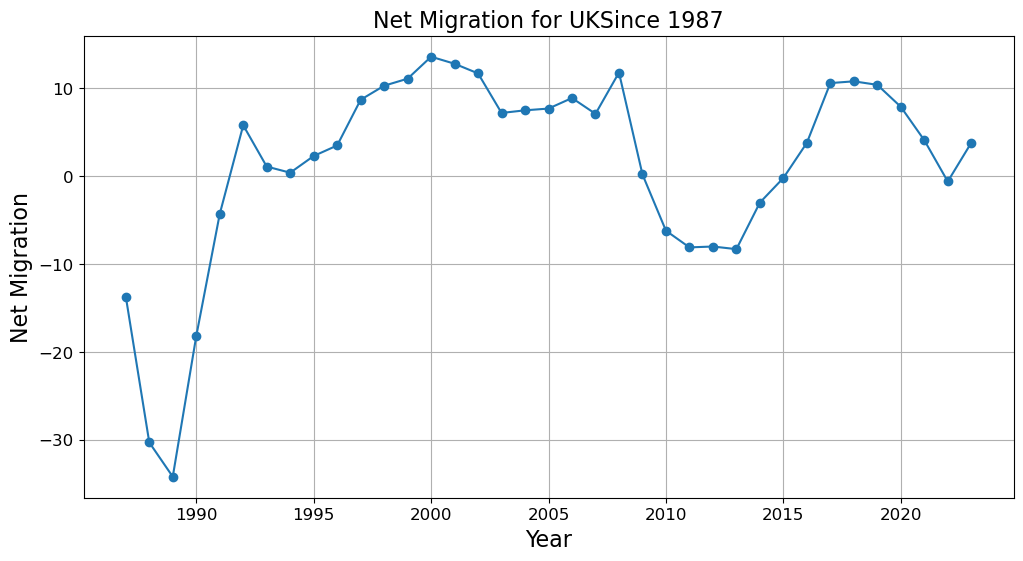

In [110]:
# Variables for country and since_year
country = "UK"
since_year = "1987"  # Example year, replace with the actual year as needed

# Filtering the DataFrame for 'Net migration', specified country, and 'Both sexes'
net_migration_country_both_sexes = df_pivot[
    (df_pivot['endpoint'] == 'Net migration') & (df_pivot['sex'] == 'Both sexes')
][['year', country]]

# Plotting the 'Net migration' data for the specified country for 'Both sexes'
plt.figure(figsize=(12, 6))
plt.plot(net_migration_country_both_sexes['year'], net_migration_country_both_sexes[country], marker='o')
plt.title(f'Net Migration for {country }Since { since_year}')
plt.xlabel('Year')
plt.ylabel('Net Migration')
plt.grid(True)

# Saving the figure with a dynamic filename based on country and since_year
filename = f"../images/citizenship_migrations_for_{country}_since_{since_year}.png"
plt.savefig(filename)
plt.show()


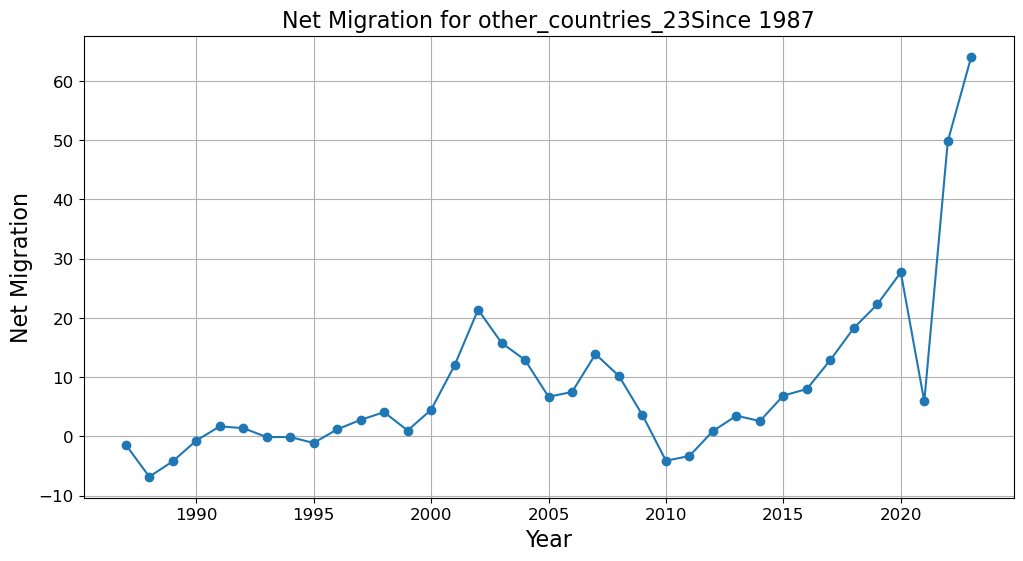

In [111]:
# Variables for country and since_year
country = "other_countries_23"
since_year = "1987"  # Example year, replace with the actual year as needed

# Filtering the DataFrame for 'Net migration', specified country, and 'Both sexes'
net_migration_country_both_sexes = df_pivot[
    (df_pivot['endpoint'] == 'Net migration') & (df_pivot['sex'] == 'Both sexes')
][['year', country]]

# Plotting the 'Net migration' data for the specified country for 'Both sexes'
plt.figure(figsize=(12, 6))
plt.plot(net_migration_country_both_sexes['year'], net_migration_country_both_sexes[country], marker='o')
plt.title(f'Net Migration for {country }Since { since_year}')
plt.xlabel('Year')
plt.ylabel('Net Migration')
plt.grid(True)

# Saving the figure with a dynamic filename based on country and since_year
filename = f"../images/citizenship_migrations_for_{country}_since_{since_year}.png"
plt.savefig(filename)
plt.show()

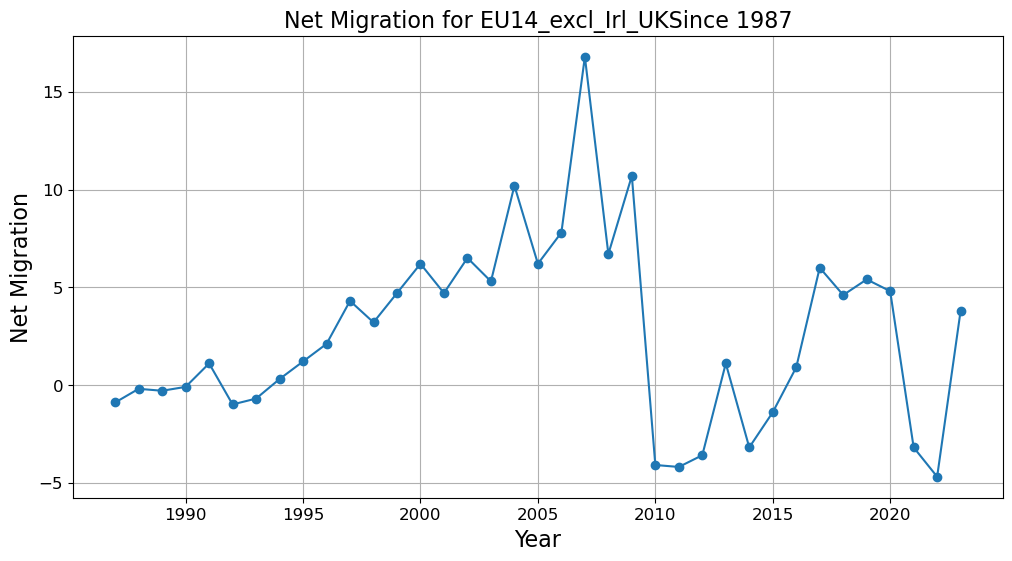

In [112]:
# Variables for country and since_year
country = "EU14_excl_Irl_UK"
since_year = "1987"  # Example year, replace with the actual year as needed

# Filtering the DataFrame for 'Net migration', specified country, and 'Both sexes'
net_migration_country_both_sexes = df_pivot[
    (df_pivot['endpoint'] == 'Net migration') & (df_pivot['sex'] == 'Both sexes')
][['year', country]]

# Plotting the 'Net migration' data for the specified country for 'Both sexes'
plt.figure(figsize=(12, 6))
plt.plot(net_migration_country_both_sexes['year'], net_migration_country_both_sexes[country], marker='o')
plt.title(f'Net Migration for {country }Since { since_year}')
plt.xlabel('Year')
plt.ylabel('Net Migration')
plt.grid(True)

# Saving the figure with a dynamic filename based on country and since_year
filename = f"../images/NetMigration_for_{country}_since_{since_year}.png"
plt.savefig(filename)
plt.show()

In [113]:
df_pivot.columns

Index(['index', 'year', 'sex', 'endpoint', 'All countries', 'Australia',
       'Canada', 'EU14_excl_Irl_UK', 'EU15_to_27', 'other_countries_23', 'UK',
       'USA'],
      dtype='object', name='country')

### Ongoing research
These mortality, fertility, and migration figures will be merged with population and other data from  [Central Statistics Office in Ireland  population of Ireland series.](https://data.cso.ie/product/pme)

In [114]:
df_pivot.to_csv('../data/pivot18_citizenship_migrations.csv', index=True)

In [115]:
df_pivot.isna().sum()

country
index                 0
year                  0
sex                   0
endpoint              0
All countries         0
Australia             0
Canada                0
EU14_excl_Irl_UK      0
EU15_to_27            0
other_countries_23    0
UK                    0
USA                   0
dtype: int64

In [116]:
df_pivot.to_csv('../data/pivot18_citizenship_migrations_cleaner.csv', index=True)

In [117]:
df_pivot.to_csv('../data/pivot18_clean_citizenship_migrations.csv', index=True)